In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


%matplotlib inline

In [96]:
df = pd.read_csv('dataset_.csv', low_memory=False)

In [97]:
df.tail()

3   4                    5           7     8       9    10  \
131440  RK95093  23  0019-07-18 16:16:27  115.238702  2139  7653.0  ON50   
131441  RK95093  23  0019-07-18 16:16:27  115.238702  2139  7668.0  ON50   
131442  RK95093  23  0019-07-18 16:16:27  115.238702  2139  7735.0  ON50   
131443  RK95093  23  0019-07-18 16:16:27  115.238702  2139  7757.0  ON50   
131444  RK95093  23  0019-07-18 16:16:27  115.238702  2139  7922.0  ON50   

          11                     12                  13  \
131440  CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
131441  CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
131442  CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
131443  CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
131444  CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   

                                        14   15   16  label        19  \
131440  RK95093-W23-D7653-1441.171/499.518  NaN  NaN      0  1441.524   
131441     RK95093-W23-D7668-314.62/443.46  NaN  NaN      0   315.015   
131442                                  no  NaN  NaN      0   486.878   
131443                                  no  NaN  NaN      0   368.044   
131444   RK95093-W23-D7922-598.52/1072.463  NaN  NaN      0   598.830   

              20      21      22          23      24  25  26  27  28  
131440   498.331  11.235  14.357  223.062000  11.235   0   0   0   1  
131441   442.272  11.235  10.612  244.963008  10.612   0   0   0   1  
131442   796.288  15.604   8.739  202.184000   8.739   0   0   0   1  
131443   429.663   2.496   1.872    2.600000   1.612   0   0   0   1  
131444  1071.151   4.369   5.618   23.267000   4.369   0   0   0   1

In [98]:
#identifikace typu příznaků
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131445 entries, 0 to 131444
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   3       131445 non-null  object 
 1   4       131445 non-null  int64  
 2   5       131445 non-null  object 
 3   7       131445 non-null  float64
 4   8       131445 non-null  int64  
 5   9       131445 non-null  float64
 6   10      131445 non-null  object 
 7   11      131445 non-null  object 
 8   12      131445 non-null  object 
 9   13      131445 non-null  object 
 10  14      54932 non-null   object 
 11  15      52221 non-null   object 
 12  16      33830 non-null   object 
 13  label   131445 non-null  int64  
 14  19      131445 non-null  float64
 15  20      131445 non-null  float64
 16  21      131445 non-null  float64
 17  22      131445 non-null  float64
 18  23      131445 non-null  float64
 19  24      131445 non-null  float64
 20  25      131445 non-null  int64  
 21  26      13

In [99]:
#přejmenování kategorických příznaků
df = df.rename(columns={"3": "C3_obj", 
                   "5": "C5_date", 
                   "10": "C10_obj",
                   "11": "C11_obj", 
                   "12": "C12_obj", 
                   "13": "C13_obj",
                   "14": "C14_obj", 
                   "15": "C15_obj", 
                   "16": "C16_obj", 
                  }, errors="raise")

In [238]:
df.describe()

C4_int     C7_single  C8_single         C9_int          label  \
count  131445.000000  1.314450e+05   131445.0  131445.000000  131445.000000   
mean       12.737365  1.152387e+02     2139.0    4026.731614       0.134398   
std         8.047386  8.526545e-14        0.0    2277.301158       0.341081   
min         1.000000  1.152387e+02     2139.0      29.000000       0.000000   
25%         3.000000  1.152387e+02     2139.0    2080.000000       0.000000   
50%        12.000000  1.152387e+02     2139.0    4029.000000       0.000000   
75%        23.000000  1.152387e+02     2139.0    6021.000000       0.000000   
max        25.000000  1.152387e+02     2139.0    7926.000000       1.000000   

             C19_int        C20_int        C21_int        C22_int  \
count  131445.000000  131445.000000  131445.000000  131445.000000   
mean      785.632992     713.665904       8.883642       6.611148   
std       445.296073     351.960433      34.641264      14.821055   
min        33.563000     110.587000       0.624000       0.624000   
25%       396.802000     412.868000       2.496000       2.496000   
50%       770.345000     697.179000       3.745000       3.744000   
75%      1183.386000    1024.081000       6.241000       6.241000   
max      1552.369000    1327.976000    1512.369000    1205.790000   

             C23_int        C24_int        C25_bin        C26_bin  \
count  131445.000000  131445.000000  131445.000000  131445.000000   
mean       68.020226       3.834675       0.397573       0.193853   
std       323.681422       5.361052       0.489398       0.395317   
min         0.645000       0.624000       0.000000       0.000000   
25%         1.704000       1.280000       0.000000       0.000000   
50%         4.562000       2.061000       0.000000       0.000000   
75%        19.920000       4.246000       1.000000       0.000000   
max     36366.434304     190.699000       1.000000       1.000000   

             C27_bin        C28_bin        RK88356        RK87760  \
count  131445.000000  131445.000000  131445.000000  131445.000000   
mean        0.258192       0.150382       0.050607       0.034478   
std         0.437642       0.357447       0.219194       0.182455   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             RK85578       S        RK81471        RK85572  
count  131445.000000  5511.0  131445.000000  131445.000000  
mean        0.013542     1.0       0.028384       0.012119  
std         0.115579     0.0       0.166069       0.109418  
min         0.000000     1.0       0.000000       0.000000  
25%         0.000000     1.0       0.000000       0.000000  
50%         0.000000     1.0       0.000000       0.000000  
75%         0.000000     1.0       0.000000       0.000000  
max         1.000000     1.0       1.000000       1.000000

In [102]:
#přejmenování ostatních příznaků
df = df.rename(columns={"4": "C4_int", 
                   "7": "C7_single", 
                   "8": "C8_single",
                   "9": "C9_int", 
                   "19": "C19_int", 
                   "20": "C20_int",
                   "21": "C21_int", 
                   "22": "C22_int", 
                   "23": "C23_int",
                   "24": "C24_int", 
                   "25": "C25_bin", 
                   "26": "C26_bin",
                   "27": "C27_bin", 
                   "28": "C28_bin", 
                  }, errors="raise")


In [103]:
df.head()

C3_obj  C4_int              C5_date   C7_single  C8_single  C9_int  \
0  RK63106       1  0019-05-02 04:13:26  115.238702       2139    54.0   
1  RK63106       1  0019-05-02 04:13:26  115.238702       2139   214.0   
2  RK63106       1  0019-05-02 04:13:26  115.238702       2139   290.0   
3  RK63106       1  0019-05-02 04:13:26  115.238702       2139   305.0   
4  RK63106       1  0019-05-02 04:13:26  115.238702       2139   352.0   

  C10_obj C11_obj                C12_obj             C13_obj C14_obj C15_obj  \
0    ON50    CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H     NaN     NaN   
1    ON50    CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H     NaN     NaN   
2    ON50    CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H     NaN     NaN   
3    ON50    CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H     NaN     NaN   
4    ON50    CJ72  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H     NaN     NaN   

  C16_obj  label  C19_int  C20_int  C21_int  C22_int     C23_int  C24_int  \
0     NaN      1   63.799  814.330   18.725   23.097  276.156000   16.617   
1     NaN      1  550.102  494.459   49.309   16.855  340.164992   16.855   
2     NaN      0  320.670  918.209    5.617    5.618   21.897000    4.679   
3     NaN      1  171.770  595.154    3.120    2.497    3.659000    1.912   
4     NaN      0  241.714  301.939    1.872    1.872    1.506000    1.227   

   C25_bin  C26_bin  C27_bin  C28_bin  
0        0        1        0        0  
1        0        1        0        0  
2        0        1        0        0  
3        0        1        0        0  
4        0        1        0        0

In [104]:
# % zastoupení "1" v binárních příznacích
binary_cols = ["label", "C25_bin","C26_bin", "C27_bin","C28_bin"]

print("%label 1: ", round(100*sum(df.label.values)/len(df.index),2),"\n"
     "%C25_bin 1: ", round(100*sum(df.C25_bin.values)/len(df.index),2),"\n"
     "%C26_bin 1: ", round(100*sum(df.C26_bin.values)/len(df.index),2),"\n"
     "%C27_bin 1: ", round(100*sum(df.C27_bin.values)/len(df.index),2),"\n"
     "%C28_bin 1: ", round(100*sum(df.C28_bin.values)/len(df.index),2))


%label 1:  13.44 
%C25_bin 1:  39.76 
%C26_bin 1:  19.39 
%C27_bin 1:  25.82 
%C28_bin 1:  15.04


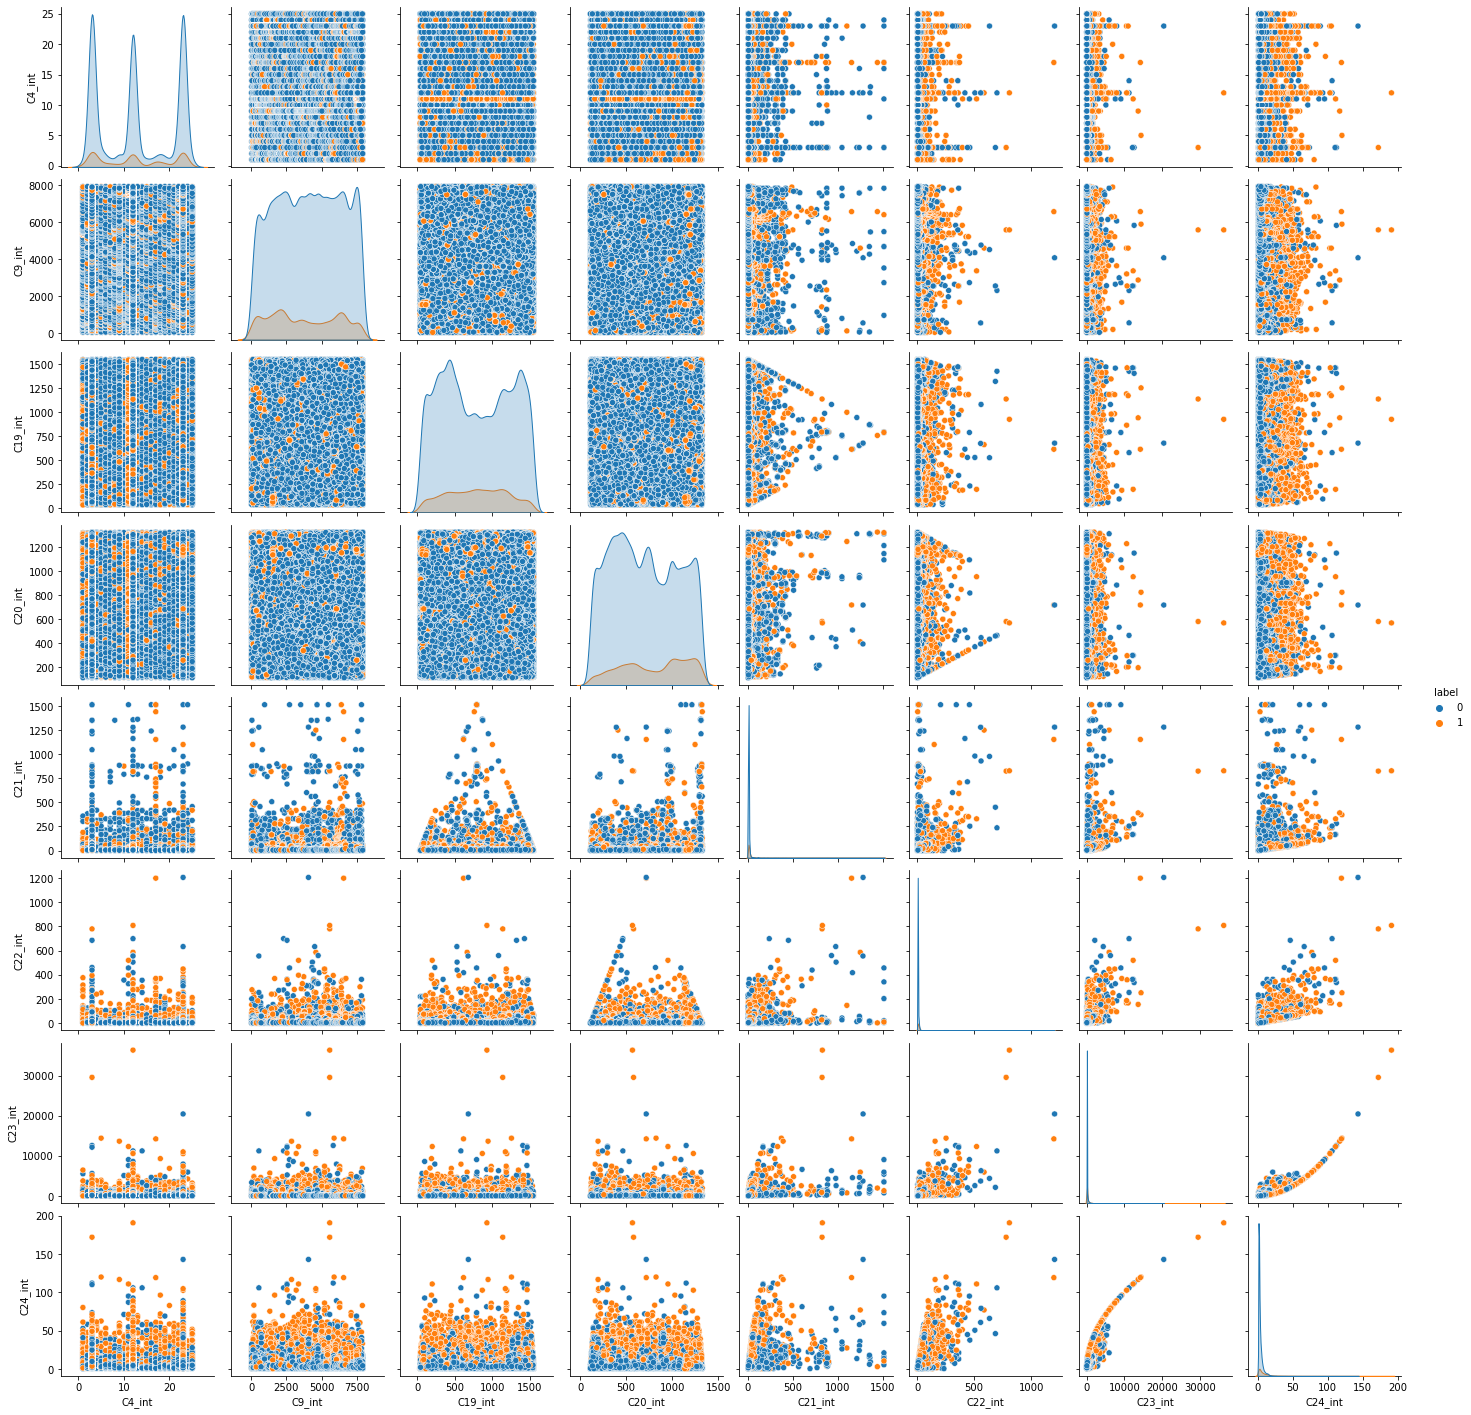

In [105]:
# pairploty numerických příznaků, hue  podle labelu 
int_cols = ["C4_int","C9_int", "C19_int", "C20_int",
            "C21_int", "C22_int", "C23_int","C24_int"]
int_cols_l = int_cols + ["label"]
int_cols_l
X = pd.DataFrame(df[int_cols_l])

sns.pairplot(data = X, hue = "label")

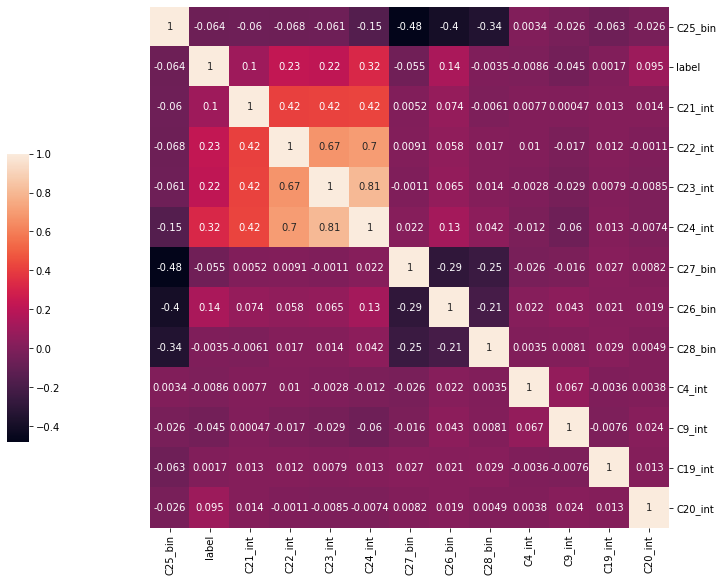

In [106]:
#korelační plot - s labelem nejvíce korelují sloupce 22-24 a 26

ib_cols = int_cols + binary_cols
IB = df[ib_cols]
cp = sns.clustermap(IB.corr(), annot=True, cbar_pos=(0, .2, .03, .4))
cp.ax_row_dendrogram.set_visible(False)
cp.ax_col_dendrogram.set_visible(False)

In [185]:
cat_cols = ["C3_obj","C5_date", "C10_obj",
            "C11_obj", "C12_obj", "C13_obj", 
           ]

ValueError: Could not interpret value `C10_obj` for parameter `x`

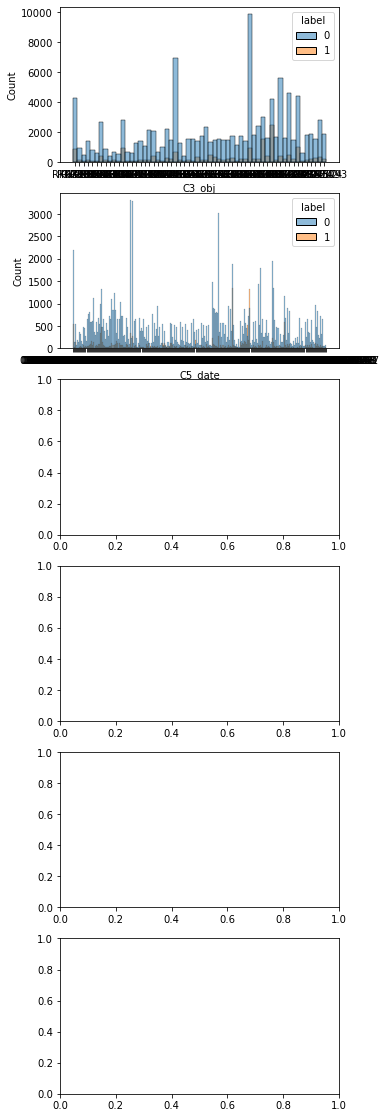

In [186]:
#histogramy kategorických příznaků, hue podle labelu
fig, axs = plt.subplots(nrows= 6, figsize=(5,20))

for i, col in enumerate(cat_cols):
    sns.histplot(data=df, x=col, ax=axs[i], hue=df["label"])


In [109]:
df.drop(columns=['C10_obj', 'C11_obj'], inplace=True)

In [181]:
gg = df[["C3_obj", 'label']].groupby(['C3_obj'], as_index=False).mean()
gg.sort_values(by='label', ascending=False)

C3_obj     label
45  RK88356  0.372670
43  RK87760  0.343116
31  RK85578  0.271910
11  RK81471  0.252747
44  RK88352  0.208374
28  RK85573  0.198076
32  RK85579  0.187500
51  RK92968  0.181477
0   RK63106  0.164835
18  RK83132  0.154855
19  RK83721  0.154450
55  RK94502  0.146192
10  RK81470  0.141304
2   RK79829  0.140655
36  RK86036  0.135533
5   RK80414  0.128508
9   RK81189  0.126452
50  RK91522  0.123396
22  RK84312  0.121980
6   RK80420  0.120458
39  RK86430  0.118313
35  RK86035  0.116576
7   RK80617  0.109438
56  RK94574  0.108194
33  RK86033  0.106205
48  RK90984  0.105928
13  RK81479  0.103916
1   RK79826  0.102767
54  RK93974  0.102404
21  RK84136  0.100740
12  RK81472  0.100551
25  RK85247  0.099057
8   RK81188  0.099034
16  RK83129  0.097601
57  RK95093  0.097585
41  RK87067  0.094540
34  RK86034  0.093788
38  RK86038  0.093684
49  RK90985  0.093657
24  RK85246  0.091880
4   RK80412  0.088565
46  RK88532  0.085980
40  RK86753  0.085179
23  RK84313  0.084429
29  RK85574  0.080376
52  RK93972  0.079563
15  RK82233  0.079333
3   RK79921  0.077074
26  RK85571  0.072840
42  RK87068  0.070108
47  RK88731  0.069767
37  RK86037  0.069594
53  RK93973  0.067416
14  RK82232  0.067114
20  RK84135  0.062956
17  RK83130  0.061270
30  RK85575  0.057224
27  RK85572  0.056497

In [194]:
# one-hot-encoding kategorií s největším zastoupením labelu v rámci sloupce 3
df['RK88356'] = 0
df.loc[df['C3_obj'] == 'RK88356', 'RK88356'] = 1

df['RK87760'] = 0
df.loc[df['C3_obj'] == 'RK87760', 'RK87760'] = 1

df['RK85578'] = 0
df.loc[df['C3_obj'] == 'RK85578', 'RK85578'] = 1

df['RK81471'] = 0
df.loc[df['C3_obj'] == 'RK81471', 'RK81471'] = 1

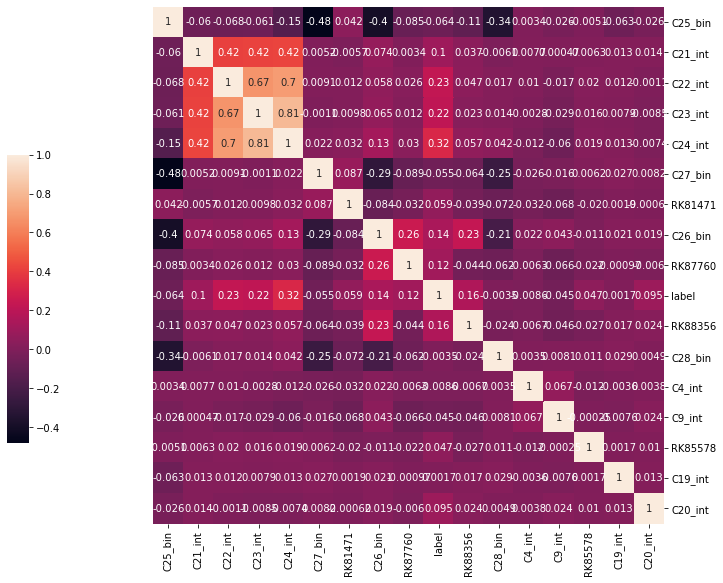

In [195]:
ibc_cols = int_cols + binary_cols + ["RK88356", "RK87760", "RK85578", "RK81471"]
IBC = df[ibc_cols]
cp = sns.clustermap(IBC.corr(), annot=True, cbar_pos=(0, .2, .03, .4))
cp.ax_row_dendrogram.set_visible(False)
cp.ax_col_dendrogram.set_visible(False)

In [183]:
gg = df[["C12_obj", 'label']].groupby(['C12_obj'], as_index=False).mean()
gg.sort_values(by='label', ascending=False)

C12_obj     label
3    WPONCV8664C3311K.01  0.185854
1  WPONCV4266-2C3311H.01  0.153541
0  WPONCV4264-2C5012H.01  0.127778
4    WPONCV8664C5011K.01  0.109353
2  WPONCV4266-2C5011H.01  0.083284

In [110]:
#sloupce 14-16, které obsahují chybějící hodnoty, obsahují pravděpodobně jen info z ostatních sloupců
pd.set_option('display.max_columns', None)
mask = df.isnull().any(axis=1)
df1 = df[~mask]
df1

C3_obj  C4_int              C5_date   C7_single  C8_single  C9_int  \
214     RK63106       3  0019-05-18 16:36:35  115.238702       2139    39.0   
215     RK63106       3  0019-05-18 16:36:35  115.238702       2139   219.0   
216     RK63106       3  0019-05-18 16:36:35  115.238702       2139   287.0   
217     RK63106       3  0019-05-18 16:36:35  115.238702       2139   288.0   
218     RK63106       3  0019-05-18 16:36:35  115.238702       2139   375.0   
...         ...     ...                  ...         ...        ...     ...   
130894  RK95093      23  0019-08-04 00:08:46  115.238702       2139  7905.0   
130895  RK95093      23  0019-08-04 00:08:46  115.238702       2139  7910.0   
130896  RK95093      23  0019-08-04 00:08:46  115.238702       2139  7922.0   
130897  RK95093      23  0019-08-04 00:08:46  115.238702       2139  7926.0   
130898  RK95093      23  0019-08-04 00:08:46  115.238702       2139  7926.0   

                      C12_obj             C13_obj  \
214     WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
215     WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
216     WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
217     WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
218     WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
...                       ...                 ...   
130894  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
130895  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
130896  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
130897  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   
130898  WPONCV4264-2C5012H.01  WPONCV4264-2C5012H   

                                    C14_obj  \
214       RK63106-W03-D0039-836.029/283.522   
215                                      no   
216     RK63106-W03-D0287-1473.557/1142.752   
217      RK63106-W03-D0288-1126.012/428.787   
218                                      no   
...                                     ...   
130894                                   no   
130895                                   no   
130896    RK95093-W23-D7922-598.52/1072.463   
130897                                   no   
130898                                   no   

                                    C15_obj  \
214                                      no   
215                                      no   
216     RK63106-W03-D0287-1475.416/1148.186   
217      RK63106-W03-D0288-1129.458/434.904   
218       RK63106-W03-D0375-311.956/484.221   
...                                     ...   
130894                                   no   
130895                                   no   
130896    RK95093-W23-D7922-598.83/1071.151   
130897                                   no   
130898                                   no   

                                    C16_obj  label   C19_int   C20_int  \
214       RK63106-W03-D0039-836.283/284.958      0   832.602   287.133   
215                                      no      0   400.892   751.351   
216     RK63106-W03-D0287-1471.646/1144.814      0  1476.999  1140.800   
217      RK63106-W03-D0288-1125.433/430.661      0  1123.199   432.179   
218       RK63106-W03-D0375-308.847/478.727      1   306.344   480.113   
...                                     ...    ...       ...       ...   
130894                                   no      0   267.518   196.265   
130895                                   no      0   797.359   416.578   
130896   RK95093-W23-D7922-599.472/1068.779      0   599.823  1067.719   
130897     RK95093-W23-D7926-191.866/847.22      0   191.606   846.469   
130898     RK95093-W23-D7926-44.874/439.673      0    45.549   438.922   

        C21_int  C22_int  C23_int  C24_int  C25_bin  C26_bin  C27_bin  C28_bin  
214       1.872    2.496    0.727    0.852        1        0        0        0  
215       1.872    2.496    0.813    0.901        1        0        0        0  
216      13.731   12.482  103.119   10.154        1        0        0        0  
217       4.369    3.744    3.859    1.964        1        0        0        0  

In [111]:
df.drop(columns=["C12_obj","C13_obj", 'C14_obj', 'C15_obj', 'C16_obj'], inplace=True)

In [112]:
y = df["label"]

In [200]:
#seznam příznaků pro klasifikaci
col_list = ["C26_bin", "C20_int",
            "C21_int", "C22_int", 
            "C23_int","C24_int",
           "RK88356", "RK87760", 
            "RK85578", "RK81471"]
CL = df[col_list]

In [115]:
# vytvoření trénovacích, validačních a testovacích datasetů
X_train, X_data, y_train, y_data = train_test_split(CL, y, test_size=0.3, random_state=40, stratify = y)
X_test, X_val, y_test, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=40)

In [116]:
# -- trvá dlouho -- 
#ladění parametru maximální hloubky stromu podle accuracy, recall, precision
test_acc, val_acc, train_acc = [],[],[]
test_prc, val_prc, train_prc = [],[],[]
test_rec, val_rec, train_rec = [],[],[]
depths = range(1,20)
for depth in depths:
    a = RandomForestClassifier(max_depth=depth)
    a = a.fit(X_train, y_train)
    y_pred_test = a.predict(X_test)
    y_pred_train = a.predict(X_train)
    y_pred_val = a.predict(X_val)
    train_acc.append(metrics.accuracy_score(y_train, y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test, y_pred_test))
    val_acc.append(metrics.accuracy_score(y_val, y_pred_val))
    
    metrics.confusion_matrix(y_val, y_pred_val)
    metrics.confusion_matrix(y_train, y_pred_train)
    metrics.confusion_matrix(y_test, y_pred_test)
    
    train_prc.append(metrics.precision_score(y_train, y_pred_train))
    test_prc.append(metrics.precision_score(y_test, y_pred_test))
    val_prc.append(metrics.precision_score(y_val, y_pred_val))
    
    train_rec.append(metrics.recall_score(y_train, y_pred_train))
    test_rec.append(metrics.recall_score(y_test, y_pred_test))
    val_rec.append(metrics.recall_score(y_val, y_pred_val))

/Users/zuzka/opt/miniconda3/envs/VZD/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzka/opt/miniconda3/envs/VZD/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zuzka/opt/miniconda3/envs/VZD/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


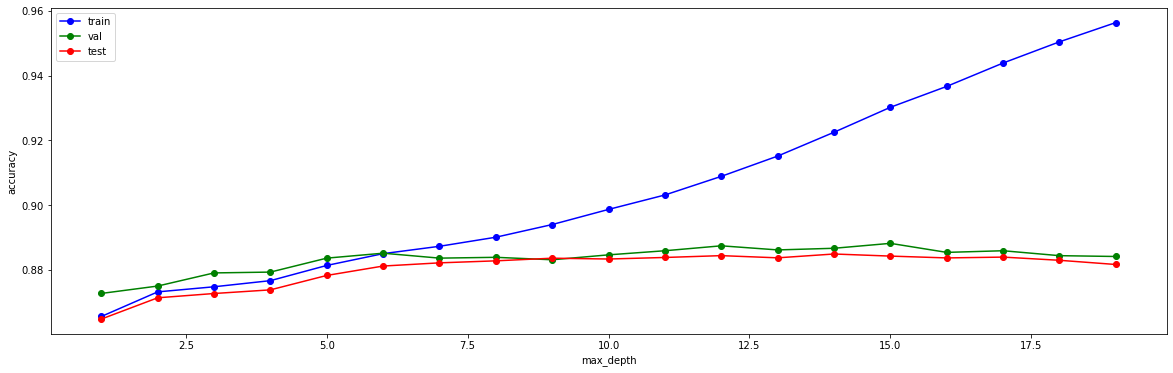

In [117]:
plt.figure(figsize=(20,6))
plt.plot(depths, train_acc,'ob-')
plt.plot(depths, val_acc,'og-')
plt.plot(depths, test_acc,'or-')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(["train", "val","test"])

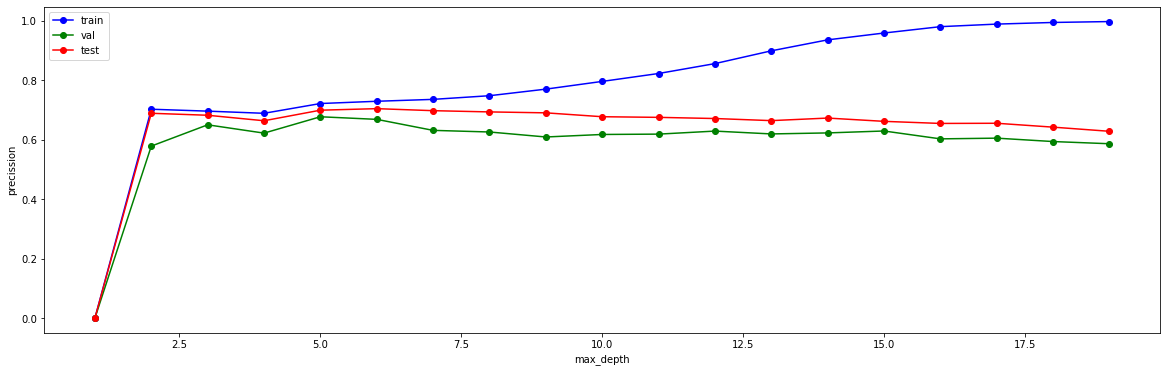

In [118]:
plt.figure(figsize=(20,6))
plt.plot(depths, train_prc,'ob-')
plt.plot(depths, val_prc,'og-')
plt.plot(depths, test_prc,'or-')
plt.xlabel("max_depth")
plt.ylabel("precission")
plt.legend(["train", "val","test"])

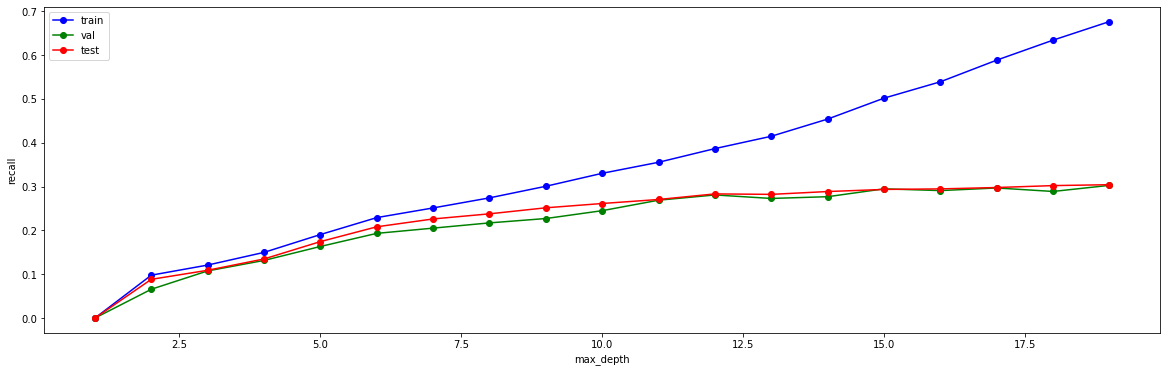

In [119]:
plt.figure(figsize=(20,6))
plt.plot(depths, train_rec,'ob-')
plt.plot(depths, val_rec,'og-')
plt.plot(depths, test_rec,'or-')
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend(["train", "val","test"])

In [125]:
# -- trvá dlouho -- 
# srovnání klasifikátorů podle přesnosti klasifikace testovacích dat
m_depth = 6
classifiers = []
classifiers.append(DecisionTreeClassifier(max_depth = m_depth))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1))
classifiers.append(RandomForestClassifier(max_depth = m_depth))
classifiers.append(AdaBoostClassifier(RandomForestClassifier(),learning_rate=1))
classifiers.append(CatBoostClassifier(max_depth = m_depth, silent = True))
classifiers.append(LGBMClassifier(max_depth = m_depth))
classifiers.append(XGBClassifier(max_depth = m_depth, use_label_encoder=False))

test_acc, train_acc = [],[]
test_prc, train_prc = [],[]
test_rec, train_rec = [],[]
numbers = [1,13,23]
for number in numbers:
    X_train, X_test, y_train, y_test = train_test_split(CL, y, test_size=0.3, random_state=number, stratify = y)
    for classifier in classifiers :
        x = classifier.fit(X_train, y_train)
        y_pred_test = x.predict(X_test)
        y_pred_train = x.predict(X_train)

        train_acc.append(metrics.accuracy_score(y_train, y_pred_train))
        test_acc.append(metrics.accuracy_score(y_test, y_pred_test))
        train_prc.append(metrics.precision_score(y_train, y_pred_train))
        test_prc.append(metrics.precision_score(y_test, y_pred_test))
        train_rec.append(metrics.recall_score(y_train, y_pred_train))
        test_rec.append(metrics.recall_score(y_test, y_pred_test))
        
name = ["DecisionTree","AB_DecisionTree",
        "RandomForest","AB_RandomForest",
        "CatBoost","LGBM","XGB"]*len(numbers)

adf = pd.DataFrame(list(zip(name, test_acc, train_acc, test_prc, train_prc, test_rec, train_rec)), columns =['classifier', "test_acc", "train_acc", "test_prc", "train_prc", "test_rec", "train_rec"])

[16:54:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [237]:
adf.head()

classifier  test_acc  train_acc  test_prc  train_prc  test_rec  \
0     DecisionTree  0.873764   0.876819  0.603470   0.642227  0.177170   
1  AB_DecisionTree  0.867728   0.999957  0.511589   0.999757  0.349811   
2     RandomForest  0.875437   0.876743  0.683712   0.717807  0.136226   
3  AB_RandomForest  0.870492   0.999957  0.530528   1.000000  0.316415   
4         CatBoost  0.885632   0.893089  0.661885   0.730875  0.304717   

   train_rec  
0   0.188420  
1   0.999919  
2   0.136584  
3   0.999677  
4   0.323710

In [135]:
colnames = adf.columns

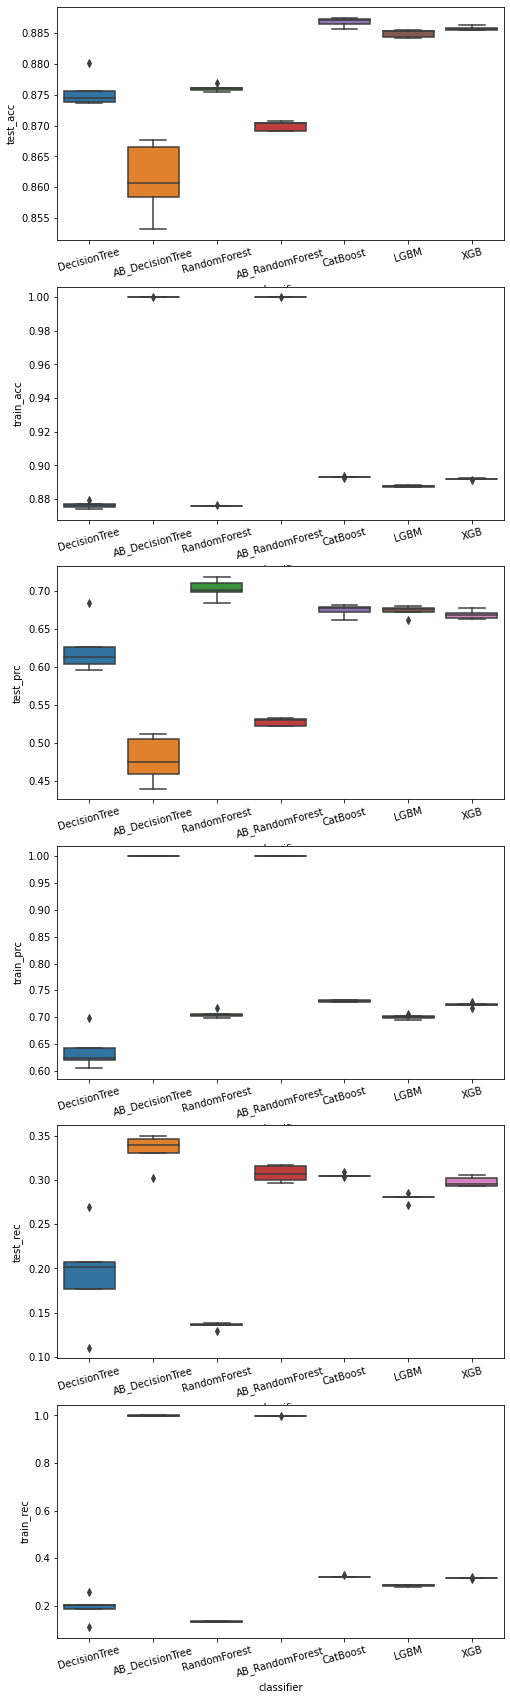

In [147]:
fig, axs = plt.subplots(nrows= 6, figsize=(8, 30))

for i, col in enumerate(colnames[1:]):
    fig = sns.boxplot(data=adf, x="classifier", y= col, ax=axs[i])
    fig.set_xticklabels(fig.get_xticklabels(), rotation=15)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(CL, y, test_size=0.3, random_state=42, stratify = y)

In [226]:
# -- trvá dlouho -- 
#catboost vypadá jako jeden z lepších klasifikátorů
#ladění dalších parametrů

range_i = np.arange(0.0, 1.0, 0.1)

test_acc, test_prc, test_rec = [],[],[]
name = []
for lr in range_i:
    for md in range(1,10):
        classifier = CatBoostClassifier(
                                silent=True,
                                learning_rate=lr,
                                max_depth=md)
        x = classifier.fit(X_train, y_train)
        y_pred_test = x.predict(X_test)
        test_acc.append(metrics.accuracy_score(y_test, y_pred_test))
        test_prc.append(metrics.precision_score(y_test, y_pred_test))
        test_rec.append(metrics.recall_score(y_test, y_pred_test))
        name.append(str(lr) +"_"+ str(md))

bdf = pd.DataFrame(list(zip(name, test_acc, test_prc, test_rec)), columns =['lr_md', "test_acc", "test_prc", "test_rec"])

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease l

In [227]:
bdf.head()

lr_md  test_acc  test_prc  test_rec
0   0.01_1  0.878531  0.711093  0.162075
1   0.01_2  0.882842  0.702864  0.222264
2   0.01_3  0.885708  0.713287  0.250189
3   0.01_4  0.887635  0.719555  0.268679
4   0.01_5  0.889486  0.726008  0.285472
..     ...       ...       ...       ...
94  1.01_5  0.878683  0.577107  0.364340
95  1.01_6  0.876401  0.558165  0.385660
96  1.01_7  0.871558  0.530260  0.388491
97  1.01_8  0.868870  0.516560  0.379623
98  1.01_9  0.868996  0.516642  0.392453

[99 rows x 4 columns]

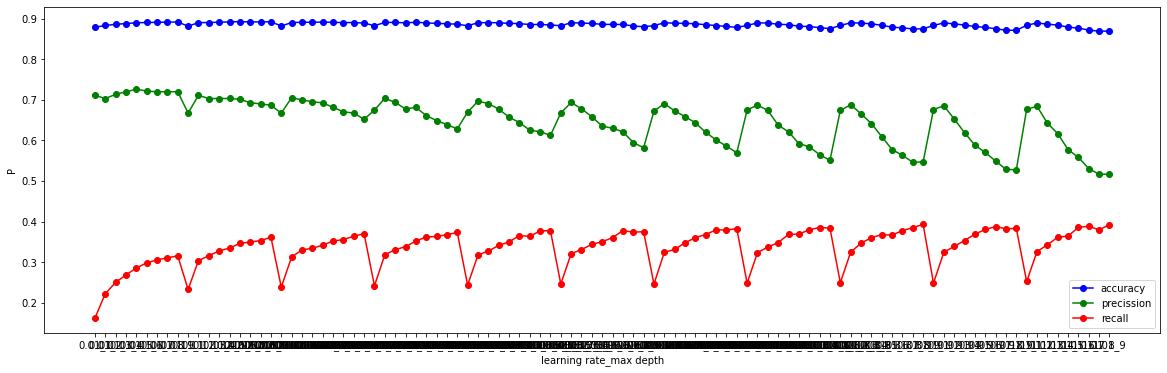

In [243]:
# recall roste s hodnotou hloubky stromu a learning rate, zatímco precision klesá
plt.figure(figsize=(20,6))
plt.plot(bdf["lr_md"], bdf["test_acc"],'ob-')
plt.plot(bdf["lr_md"], bdf["test_prc"],'og-')
plt.plot(bdf["lr_md"], bdf["test_rec"],'or-')
plt.xlabel("learning rate_max depth")
plt.ylabel("P")
plt.legend(["accuracy", "precission","recall"])


In [234]:
bdf.sort_values(by='test_prc', ascending=False)

lr_md  test_acc  test_prc  test_rec
4   0.01_5  0.889486  0.726008  0.285472
5   0.01_6  0.890222  0.721386  0.298491
8   0.01_9  0.891490  0.719759  0.315472
6   0.01_7  0.890653  0.719556  0.305472
3   0.01_4  0.887635  0.719555  0.268679
..     ...       ...       ...       ...
96  1.01_7  0.871558  0.530260  0.388491
88  0.91_8  0.871177  0.528706  0.382264
89  0.91_9  0.870949  0.527410  0.383019
98  1.01_9  0.868996  0.516642  0.392453
97  1.01_8  0.868870  0.516560  0.379623

[99 rows x 4 columns]

In [236]:
bdf.sort_values(by='test_rec', ascending=False)

lr_md  test_acc  test_prc  test_rec
80                 0.81_9  0.874626  0.546695  0.393208
98                 1.01_9  0.868996  0.516642  0.392453
96                 1.01_7  0.871558  0.530260  0.388491
87                 0.91_7  0.874905  0.549051  0.387547
95                 1.01_6  0.876401  0.558165  0.385660
..                    ...       ...       ...       ...
27  0.31000000000000005_1  0.882411  0.674382  0.241887
18  0.21000000000000002_1  0.881650  0.667018  0.238491
9                  0.11_1  0.881270  0.667027  0.232830
1                  0.01_2  0.882842  0.702864  0.222264
0                  0.01_1  0.878531  0.711093  0.162075

[99 rows x 4 columns]

In [248]:
classifier = CatBoostClassifier(silent=True,
                                learning_rate=0.01,
                                max_depth=5)

x = classifier.fit(X_train, y_train)
y_pred_test = x.predict(X_test)

print("CatBoost -- LR:0.01 -- MD:5 : ", "\n",
      "test accuracy: ", metrics.accuracy_score(y_test, y_pred_test), "\n",
      "test_precission: ", metrics.precision_score(y_test, y_pred_test), "\n",
      "test_recall: ", metrics.recall_score(y_test, y_pred_test))

CatBoost -- LR:0.01 -- MD:5 :  
 test accuracy:  0.8894862301567176 
 test_precission:  0.7260076775431862 
 test_recall:  0.28547169811320755


In [249]:
classifier = CatBoostClassifier(silent=True,
                                learning_rate=0.8,
                                max_depth=8)

x = classifier.fit(X_train, y_train)
y_pred_test = x.predict(X_test)

print("CatBoost -- LR:0.8 -- MD:8 : ", "\n",
      "test accuracy: ", metrics.accuracy_score(y_test, y_pred_test), "\n",
      "test_precission: ", metrics.precision_score(y_test, y_pred_test), "\n",
      "test_recall: ", metrics.recall_score(y_test, y_pred_test))

CatBoost -- LR:0.8 -- MD:8 :  
 test accuracy:  0.8759953339757569 
 test_precission:  0.5551965535810447 
 test_recall:  0.3890566037735849
